In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

import numpy as np

import sklearn
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from helper_functions import plot_decision_boundary, accuracy_fn
from three_way_plotter import plot_decision_boundary_3w

from collections import Counter

from models_loss_optim import *

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

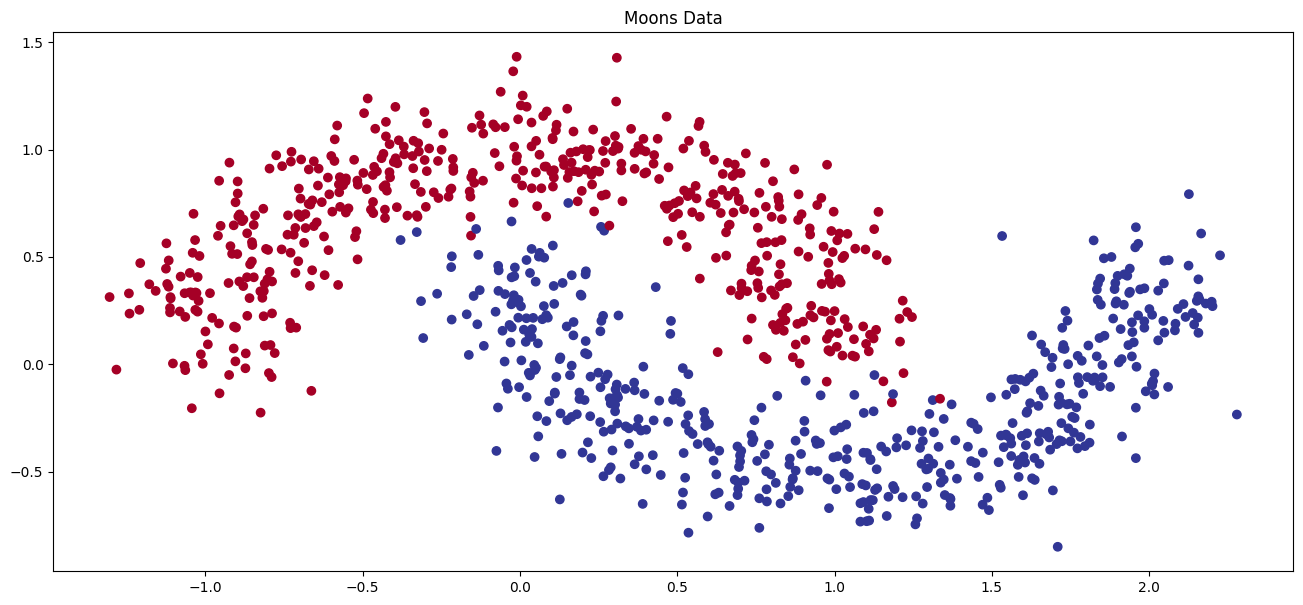

In [3]:

X_moon, y_moon = make_moons(n_samples=1000, 
                            noise=0.15, 
                            random_state=50, 
                            shuffle=True)

fig = plt.figure(figsize=(16, 7))
plt.title("Moons Data")
plt.scatter(X_moon[:, 0],
            X_moon[:, 1],
            c=y_moon,
            cmap=plt.cm.RdYlBu);

In [4]:
class_counts = Counter(y_moon)
print(class_counts)

Counter({0: 500, 1: 500})


In [5]:
number_classes = set(y_moon)
print(f"Number of classes: {len(number_classes)}  Class labels: {number_classes}")

Number of classes: 2  Class labels: {0, 1}


In [6]:
count_0 = 0
count_1 = 0
for label in y_moon:
    if label == 0:
        count_0 += 1
    else:
        count_1 += 1
print(f"Number of 0 labels: {count_0}")
print(f"Number of 1 labels: {count_1}")

Number of 0 labels: 500
Number of 1 labels: 500


In [7]:
print(f"Content Sample X_moon:\n {X_moon[:5]}\n")
print(f"Content Sample y_moon:\n {y_moon[:5]}\n")
print(f"Data-Type: {type(X_moon)} | Size: {X_moon.shape} | Content-Type: {X_moon.dtype}")
print(f"Data-Type: {type(y_moon)} | Size: {y_moon.shape} | Content-Type: {y_moon.dtype}")

Content Sample X_moon:
 [[-0.32832119  0.69426844]
 [-1.12410735  0.56329505]
 [ 1.71703455 -0.08897746]
 [ 1.01937703  0.38073958]
 [ 2.15983359  0.30244495]]

Content Sample y_moon:
 [0 0 1 0 1]

Data-Type: <class 'numpy.ndarray'> | Size: (1000, 2) | Content-Type: float64
Data-Type: <class 'numpy.ndarray'> | Size: (1000,) | Content-Type: int64


In [8]:
X_moon = torch.from_numpy(X_moon).type(torch.float32)
y_moon = torch.from_numpy(y_moon).type(torch.LongTensor)

In [9]:
print(f"Data-Type: {type(X_moon)} | Size: {X_moon.shape} | Content-Type: {X_moon.dtype}")
print(f"Data-Type: {type(y_moon)} | Size: {y_moon.shape} | Content-Type: {y_moon.dtype}")

Data-Type: <class 'torch.Tensor'> | Size: torch.Size([1000, 2]) | Content-Type: torch.float32
Data-Type: <class 'torch.Tensor'> | Size: torch.Size([1000]) | Content-Type: torch.int64


In [10]:
X_hold, X_test, y_hold, y_test = train_test_split(X_moon, y_moon, 
                                                  test_size=0.1, 
                                                  random_state=50, 
                                                  stratify=y_moon)

In [11]:
print(X_hold.shape, y_hold.shape)
print(X_test.shape, y_test.shape)

torch.Size([900, 2]) torch.Size([900])
torch.Size([100, 2]) torch.Size([100])


In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_hold, y_hold,
                                                  test_size=0.2, random_state=50,
                                                  stratify=y_hold)

In [13]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

torch.Size([720, 2]) torch.Size([720])
torch.Size([180, 2]) torch.Size([180])
torch.Size([100, 2]) torch.Size([100])


In [14]:
def model_architecture(model):
    model_architecture = str(model).replace("(", " ").replace(")", " ")
    return model_architecture

moon_model_V1_1_architecture = model_architecture(moon_model_V1_1)
moon_model_V1_2_architecture = model_architecture(moon_model_V1_2)

moon_model_V2_1_architecture = model_architecture(moon_model_V2_1)
moon_model_V2_2_architecture = model_architecture(moon_model_V2_2)

moon_model_V3_1_architecture = model_architecture(moon_model_V3_1)
moon_model_V3_2_architecture = model_architecture(moon_model_V3_2)


In [15]:
print(loss_fn_1)
print(loss_fn_2)

BCEWithLogitsLoss()
CrossEntropyLoss()
